# Exercise 1

## Velocity Profile of a Viscous Fluid Between Coaxial Cylinders

A viscous fluid is confined between two coaxial cylinders with radii $ R_1 = 0.1 $ and $R_2 = 10$ (in arbitrary units). The inner cylinder rotates with an angular velocity of ($\Omega_1 = 1$), while the outer cylinder remains stationary ($\Omega_2 = 0$).

For this configuration, the Navier-Stokes equations simplify to the following ordinary differential equation (ODE) for the velocity profile \( v(r) \):

$$
\frac{d^2 v}{d r^2} + \frac{1}{r} \frac{d v}{d r} - \frac{v}{r^2} = 0
$$

### Task 1: Solve and Plot the Velocity Profile

Find and plot the velocity profile \( v(r) \) in the region \( R_1 \leq r \leq R_2 \), subject to the boundary conditions:

$$
v(R_1) = \Omega_1 R_1, \quad \left. \frac{d v}{d r} \right|_{R_1} = -1.0002.
$$

### Task 2: Shooting Method Approach

Now, assume the value of $( \frac{d v}{d r} )$ at $( R_1 )$ is unknown. Use the shooting method with the boundary conditions:

$$
v(R_1) = \Omega_1 R_1, \quad v(R_2) = 0
$$

to determine that this indeed implies:

$$
\left. \frac{d v}{d r} \right|_{R_1} = -1.0002.
$$

# Solution

## Exercise 1

For completeness I will solve also for the pressure and fluid surface profiles. The system of equations becomes

$$
\frac{d^2 v}{d r^2} + \frac{1}{r} \frac{d v}{d r} - \frac{v}{r^2} = 0
$$

$$ 
\frac{dp}{dr} = \frac{\rho v^2}{r}
$$

$$
\frac{dh}{dr} = \frac{\Omega^2 r}{g} ,
$$

where I will take $\rho = 1$ (fluid density), $p(R_1) =1$.

In [6]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# Questa funzione rappresenta il sistema di equazioni ODE
# y contiene 4 quantità:
#   y[0] = v(r)    → velocità tangenziale
#   y[1] = dv/dr   → derivata prima della velocità
#   y[2] = p(r)    → pressione
#   y[3] = h(r)    → altezza della superficie libera
#
# La funzione restituisce le derivate:
#   [ dv/dr , d²v/dr² , dp/dr , dh/dr ]
# -----------------------------------------------------------
def f(y, r, rho, g):
    
    vr   = y[0]   # velocità v(r)
    dvdr = y[1]   # dv/dr
    pr = y[2]     # pressione p(r)
    hr = y[3]     # altezza h(r)
    
    # velocità angolare locale (v = ω r → ω = v/r)
    omegar = vr / r
    
    # Eq. differenziale della velocità derivata da Navier–Stokes
    # d²v/dr² = -1/r * dv/dr + v/r²
    d2vdr2 = -1.0/r * dvdr + vr / r**2 
    
    # Gradiente di pressione risultante dalla forza centrifuga
    # dp/dr = ρ v² / r
    dpdr = rho * vr**2 / r 
    
    # Profilo dell’altezza del fluido (equilibrio idrostatico centrifugo)
    # dh/dr = ω² r / g
    dhdr = omegar**2 * r / g
    
    return np.array([dvdr, d2vdr2, dpdr, dhdr])


# -----------------------------------------------------------
# Questa funzione integra il profilo di velocità tra R1 e R2
#
# dv1 = valore ignoto di dv/dr al bordo interno (serve tipo shooting method)
# r   = array radiale
# specs = [R1, R2, Omega1, Omega2, p0, h0]
# -----------------------------------------------------------
def vprofile(dv1, r, specs):

    R1 = specs[0]       # raggio cilindro interno
    R2 = specs[1]       # raggio cilindro esterno
    Omega1 = specs[2]   # velocità angolare al bordo interno
    Omega2 = specs[3]   # velocità angolare al bordo esterno (di solito 0)
    p0 = specs[4]       # pressione iniziale al bordo interno
    h0 = specs[5]       # altezza iniziale

    # -------------------------------------------------------
    # Condizioni iniziali:
    # y0 = [ v(R1) , dv/dr(R1) , p(R1) , h(R1) ]
    #
    # v(R1) = Omega1 * R1    → velocità al cilindro interno
    # dv1 = valore sconosciuto da stimare
    # p0, h0 = valori assegnati
    # -------------------------------------------------------
    y0 = np.array([Omega1 * R1, dv1, p0, h0])

    # -------------------------------------------------------
    # Integrazione dell’ODE su tutta la griglia radiale r
    # integrate.odeint restituisce un array con:
    #   y[:,0] = v(r)
    #   y[:,1] = dv/dr(r)
    #   y[:,2] = p(r)
    #   y[:,3] = h(r)
    # -------------------------------------------------------
    y = integrate.odeint(f, y0, r, args=(rho, g))
    
    return y


In [7]:
# Solving by shooting method

import scipy.optimize as opt

R1 = 0.1
R2 = 10.
Omega1 = 1.
Omega2 = 0.
rho = 1.
p0 = 1.


h0 = 1.
g = 9.8

# Velocity of the external cylinder as a function of 
# the velocity derivative in R1
def vr2(dv1):   
    specs = [R1,R2,Omega1,Omega2,p0,h0] # R1,R2,Omega1,Omega2
    # Times at which I sample x(t)
    dR = abs(R1 - R2)
    #print(dR)
    r = np.arange(R1,R2+dR,dR)
    #print(r[-1])
    y = vprofile(dv1,r,specs)
    return y[-1,0]

# Finding root
va = -10.
vb = 10.
root = opt.root_scalar(vr2, method='bisect', bracket=[va,vb])

print("The initial value of dv/dr that satistfies the stationary cylinder boundary condition is dv/dr =", root.root)

The initial value of dv/dr that satistfies the stationary cylinder boundary condition is dv/dr = -1.0002001351119816


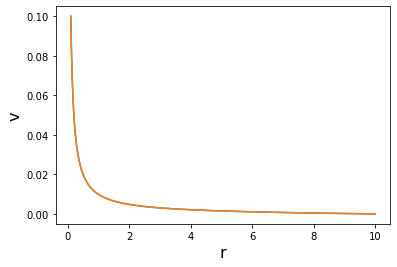

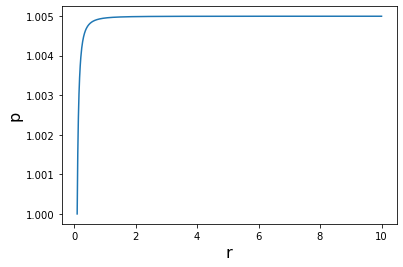

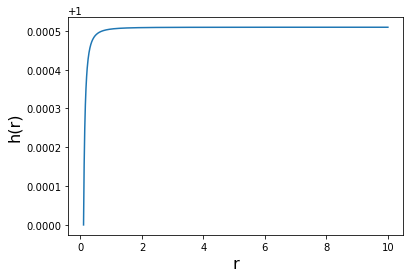

In [8]:
# TESTING AND PLOTTING PROFILES

# Radii at which I sample v(r)
dR = (R2-R1)/1000.
r = np.arange(R1,R2+dR,dR)
dv1 = root.root

# Numerically computing and plotting velocity profile
specs = [R1,R2,Omega1,Omega2,p0,h0]
y = vprofile(dv1,r,specs)
plt.plot(r,y[:,0])
plt.xlabel('r',size=16)
plt.ylabel('v',size=16)

# Analytical solution for comparison
A = (Omega2*R2**2 - Omega1*R1**2)/(R2**2 - R1**2)
B = - ((Omega2 - Omega1)*R1**2*R2**2)/(R2**2-R1**2)
plt.plot(r, A*r + B/r)

plt.show()

# Plotting pressure profile
plt.plot(r,y[:,2])
plt.xlabel('r',size=16)
plt.ylabel('p',size=16)
plt.show()

# Plotting height of liquid free surface (h = 0 in R1)
plt.plot(r,y[:,3])
plt.xlabel('r',size=16)
plt.ylabel('h(r)',size=16)
plt.show()


# Exercise 2

### Yield to Maturity (YTM) of a Bond  

In finance, the **yield to maturity (YTM)** of a bond is determined using the following formula:  

$$
AV = \sum_{t=1}^{T} \frac{F_t}{(1 + YTM)^t}
$$

### Formula Components  
- **AV**: The actual value of the bond (i.e., the price you pay when purchasing it).  
- **T**: The bond's maturity period, which is the time until the bond expires and its face value is repaid (e.g., \( T = 3 \) years).  
- **\( F_t \)**: The cash flow received at each coupon payment.  

---

## Task 1: Compute the Actual Value (AV)  

1. Write a Python function to implement the formula above.  


2. Now assume you purchase a bond with these features:  
- **Nominal value** \( n = 1000 \) Euros  
- **Annual interest rate** \( r = 0.03 \) (3%)  
- **Maturity period** \( T = 5 \) years  

For the first four years ($t = 1, 2, 3, 4$), you receive an annual coupon payment:  
$
F_t = n \times r = 1000 \times 0.03 = 30 \text{ Euros per year}
$  

On the fifth year ($t = 5$), the bond matures, and you receive the final payment:  
$
F_5 = n(1 + r) = 1000 \times (1.03) = 1030 \text{ Euros}
$  

At the time of purchase, financial analysts estimate that **YTM = 4%** (**0.04**).  
  
Use your Python function to compute the **Actual Value (AV)** of the bond.  

---

## Task 2: Compute YTM  
For the same bond as in **Task 1**, assume that:  
- You know the **Actual Value (AV) = 955.48** Euros.  
- You also know all **$ F_t $** values.  
- However, you **do not know YTM**.  
  
Find the **Yield to Maturity (YTM)** using the formula above and a **root-finding algorithm** of your choice.  

In [4]:
import numpy as np
import scipy.optimize as opt

def AV(T,YTM,r,value):
    # AV = actual value
    # T = total number of years
    # YTM = yield to maturity
    # r = nominal interest
    # value = nominal value (price of the bond when it is issued by the state/company)
    AV = 0.
    coupon = r*value
    for i in range(T-1):
        AV += coupon/(1. + YTM)**(i+1)
    AV += (coupon + value)/(1. + YTM)**(i+2)
    return AV

# Testing
AV = AV(5,0.04,0.03,1000)
print('AV =', AV)

AV = 955.481776689838


YTM = 0.04000041062801756
 


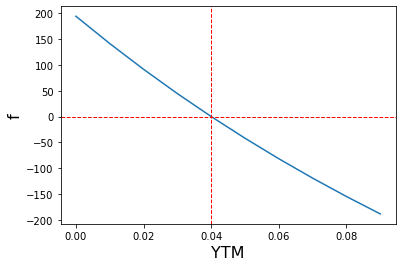

In [5]:
def AV(T,YTM,r,value):
    # AV = actual value
    # T = total number of years
    # YTM = yield to maturity
    # r = nominal interest
    # value = nominal value (price of the bond when it is issued by the state/company)
    AV = 0.
    coupon = r*value
    for i in range(T-1):
        AV += coupon/(1. + YTM)**(i+1)
    AV += (coupon + value)/(1. + YTM)**(i+2)
    return AV


def YTM(price,T,r,value):
    
    def find_ytm(y):
        f = AV(T,y,r,value) - price 
        return f
    
    a = 0.01
    b = 0.5
    root = opt.root_scalar(find_ytm, method='bisect', bracket=[a,b])
    return root.root


y = YTM(955.48,5,0.03,1000)
print('YTM =', y)
print(' ')

# Plotting to validate solution
values = [ ]
ys = [ ]
for yld in np.arange(0,0.1,0.01):
    ys.append(yld)
    val = AV(5,yld,0.03,1000) - 955.48
    values.append(val)

plt.plot(ys,values)
plt.axhline(linestyle='dashed',color = 'red', lw = 1)
plt.axvline(x=y,ls='dashed',color='r',lw=1)
plt.xlabel('YTM', size = 16)
plt.ylabel('f', size = 16)
plt.show()